In [37]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium import Choropleth

In [38]:
# Defining df1 as "TEST.xlsx"
df1 = pd.read_excel("TEST.xlsx")
df1['Percent of Children with Confirmed BLLs ≥5 µg/dL'] = df1['Percent of Children with Confirmed BLLs ≥5 µg/dL'] * 100
df1.head(10)

County Name  Total Population of Children <72 Months of Age  \
0       Albany                                           17940   
1     Allegany                                            2921   
2        Bronx                                          117441   
3       Broome                                           11605   
4  Cattaraugus                                            5196   
5       Cayuga                                            4467   
6   Chautauqua                                            8153   
7      Chemung                                            5429   
8     Chenango                                            2938   
9      Clinton                                            4563   

   Number of Children Tested <72 Months of Age  \
0                                         3779   
1                                          678   
2                                        46565   
3                                         2087   
4                                         1190   
5                                         1012   
6                                         1733   
7                                          970   
8                                          685   
9                                          880   

   Number of Children with Confirmed BLLs ≥5 µg/dL  \
0                                              168   
1                                               32   
2                                              413   
3                                               55   
4                                               85   
5                                               50   
6                                              124   
7                                               29   
8                                               40   
9                                               10   

   Percent of Children with Confirmed BLLs ≥5 µg/dL  
0                                               4.4  
1                                               4.7  
2                                               0.9  
3                                               2.6  
4                                               7.1  
5                                               4.9  
6                                               7.2  
7                                               3.0  
8                                               5.8  
9                                               1.1

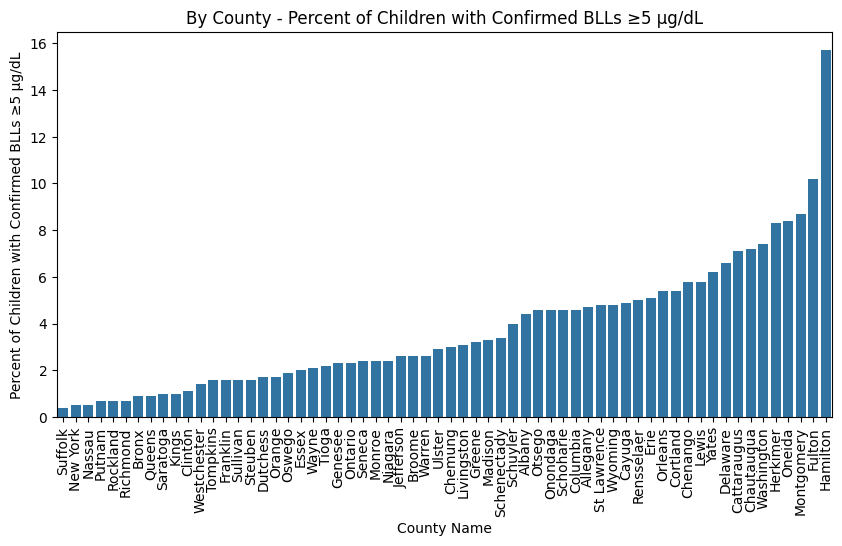

In [39]:
# Visualizing df1
df1_sorted = df1.sort_values(by="Percent of Children with Confirmed BLLs ≥5 µg/dL")
plt.figure(figsize=(10,5))
visual_df1 = sns.barplot(data=df1_sorted, x="County Name", y="Percent of Children with Confirmed BLLs ≥5 µg/dL")
plt.title("By County - Percent of Children with Confirmed BLLs ≥5 µg/dL")
plt.xticks(rotation=90)
plt.show()

In [40]:
# Defining gdf as "NYS.geojson"
gdf = gpd.read_file("NYS.geojson")
gdf.head(10)

OBJECTID         NAME ABBREV GNIS_ID FIPS_CODE    SWIS    NYSP_ZONE  \
0         1       Albany   ALBA  974099     36001  010000         East   
1         2     Allegany   ALLE  974100     36003  020000         West   
2         3        Bronx   BRON  974101     36005  600000  Long Island   
3         4       Broome   BROO  974102     36007  030000      Central   
4         5  Cattaraugus   CATT  974103     36009  040000         West   
5         6       Cayuga   CAYU  974104     36011  050000      Central   
6         7   Chautauqua   CHAU  974105     36013  060000         West   
7         8      Chemung   CHEM  974106     36015  070000      Central   
8         9     Chenango   CHEN  974107     36017  080000      Central   
9        10      Clinton   CLIN  974108     36019  090000         East   

   POP1990  POP2000  POP2010  POP2020 DOS_LL DOSLL_DATE NYC   CALC_SQ_MI  \
0   292594   294565   304204   314848   None       None   N   532.791779   
1    50470    49927    48946    46456   None       None   N  1035.209131   
2  1203789  1332650  1385108  1472654   None       None   Y    57.472148   
3   212160   200536   200600   198683   None       None   N   715.287465   
4    84234    83955    80317    77042   None       None   N  1324.309219   
5    82313    81963    80026    76248   None       None   N   881.823505   
6   141895   139750   134905   127657   None       None   N  1507.794553   
7    95195    91070    88830    84148   None       None   N   410.959316   
8    51768    51401    50477    47220   None       None   N   897.818644   
9    85969    79894    82128    79843   None       None   N  1116.813729   

                         DATEMOD  \
0  Fri, 10 Nov 2017 00:00:00 GMT   
1  Fri, 26 Apr 2019 00:00:00 GMT   
2  Fri, 04 Oct 2019 00:00:00 GMT   
3  Fri, 26 Apr 2019 00:00:00 GMT   
4  Fri, 26 Apr 2019 00:00:00 GMT   
5  Wed, 18 Jul 2018 00:00:00 GMT   
6  Fri, 26 Apr 2019 00:00:00 GMT   
7  Fri, 26 Apr 2019 00:00:00 GMT   
8  Wed, 03 Oct 2018 00:00:00 GMT   
9  Fri, 07 Dec 2018 00:00:00 GMT   

                                            geometry  
0  POLYGON ((-73.70733 42.78606, -73.70398 42.783...  
1  POLYGON ((-78.29218 42.5214, -78.29047 42.5214...  
2  POLYGON ((-73.86567 40.9022, -73.863 40.90145,...  
3  POLYGON ((-75.86417 42.41555, -75.86379 42.413...  
4  POLYGON ((-79.02148 42.53804, -79.01937 42.537...  
5  POLYGON ((-76.6066 43.28014, -76.60642 43.2775...  
6  POLYGON ((-79.12588 42.56524, -79.12534 42.565...  
7  POLYGON ((-76.77851 42.29433, -76.7705 42.2944...  
8  POLYGON ((-75.42842 42.74536, -75.42829 42.743...  
9  POLYGON ((-73.36528 44.70234, -73.36531 44.701...

In [43]:
# Choropleth map

# Loading data
df1 = pd.read_excel("TEST.xlsx")
gdf = gpd.read_file("NYS.geojson")

# Converting last column of df1 into percentage values
df1['Percent of Children with Confirmed BLLs ≥5 µg/dL'] = df1['Percent of Children with Confirmed BLLs ≥5 µg/dL'] * 100

# Merging df1 and gdf
gdf = gdf.merge(df1, left_on="NAME", right_on="County Name", how="left")

# Defining choropleth thresholds
thresholds = [0, 2, 4, 6, 8, 10, 12, 14, 16]

# Creating blank map
ny_map = folium.Map(location=[42.8, -75.5], zoom_start=7, tiles="cartodbpositron")

# Creating choropleth map
folium.Choropleth(
    geo_data=gdf,
    name="choropleth",
    data=gdf,
    columns=["NAME", "Percent of Children with Confirmed BLLs ≥5 µg/dL"],
    key_on="feature.properties.NAME",
    fill_color="YlOrRd",
    fill_opacity=0.8,
    line_opacity=0.2,
    threshold_scale=thresholds,
    legend_name="Percent of Children with Confirmed BLLs ≥5 µg/dL"
).add_to(ny_map)

# Display the map
ny_map